In [1]:
from examtoolbox import *

# Variance Models

In [2]:
n_experiments = 100
n_trials = 50
mu_s = 1
mu_s0 = 0
sigma_s = 1
sigma_s0 = 1
equl_var = Variance_Model(n_experiments, n_trials, mu_s, mu_s0, sigma_s, sigma_s0)
un_equl_var = Variance_Model(n_experiments, n_trials, mu_s, mu_s0, 0.8, sigma_s0)

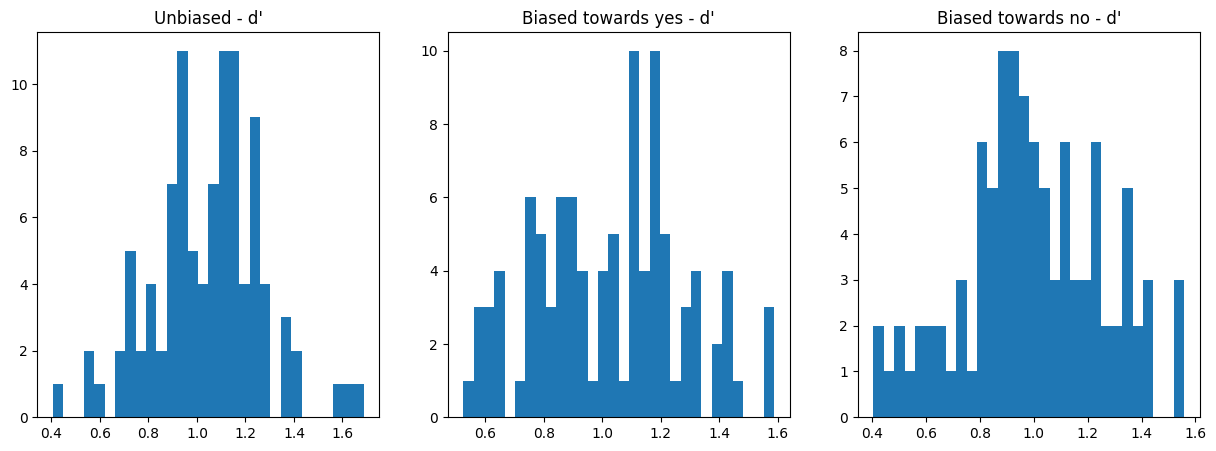

The d prime for the unbiased criterion: 1.0456080536266859
The d prime for the biased towards yes criterion: 1.023983723608489
The d prime for the biased towards no criterion: 0.9973101005487378


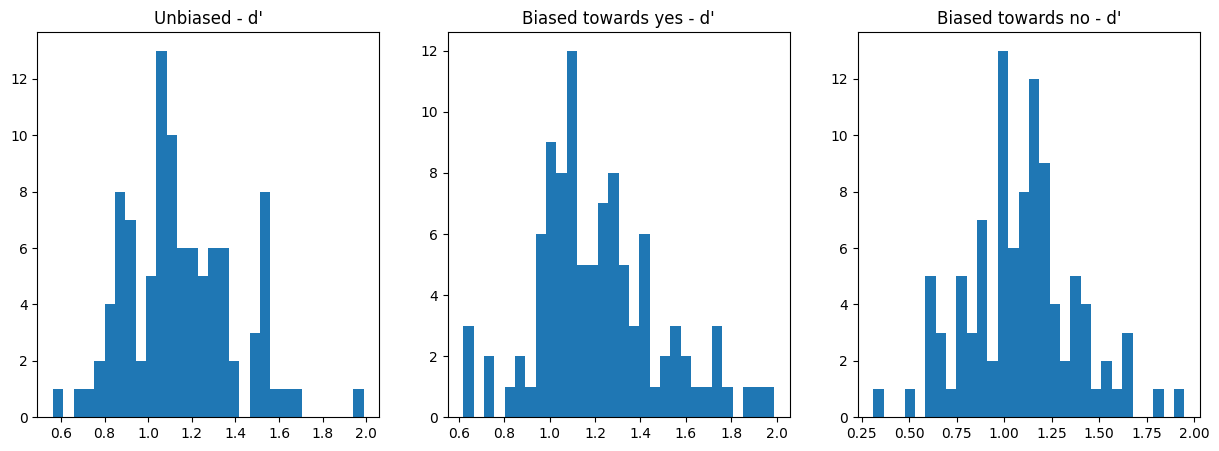

The d prime for the unbiased criterion: 1.1481840210730707
The d prime for the biased towards yes criterion: 1.2159834919664745
The d prime for the biased towards no criterion: 1.0895113329174029


In [3]:
cs = [0.5, 0.3, 0.7]
equl_var.plot_histogram(cs)
un_equl_var.plot_histogram(cs)

## Unequal variances with multiple criterions

In [2]:
cs = [0.2, 0.5, 0.8]
model = Variance_Model_2(100, 50, 1, 1, 0.8, cs)

tps, fps, tns, fns = model.simulate(return_tp_fp=True)

In [3]:
tps

[0.5795999999999999, 0.6978000000000003, 0.7966]

d_prime for this model is:  [0.46917907 0.35867416 0.26444862]


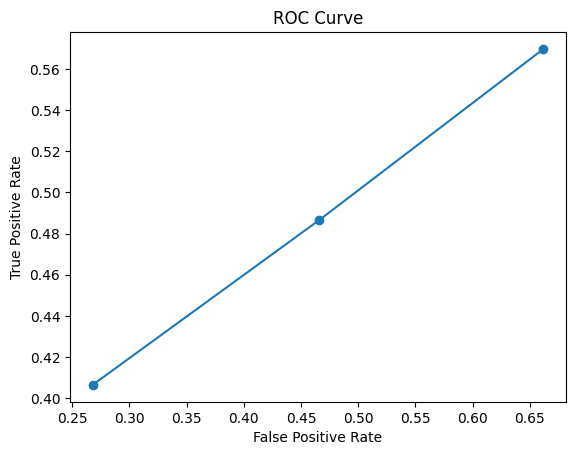

In [4]:
roc1 = ROC(np.array(tps), np.array(fps), np.array(tns), np.array(fns))

roc1.d_prime(50)

roc1.plot_ROC(inverse=False)

/opt/homebrew/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


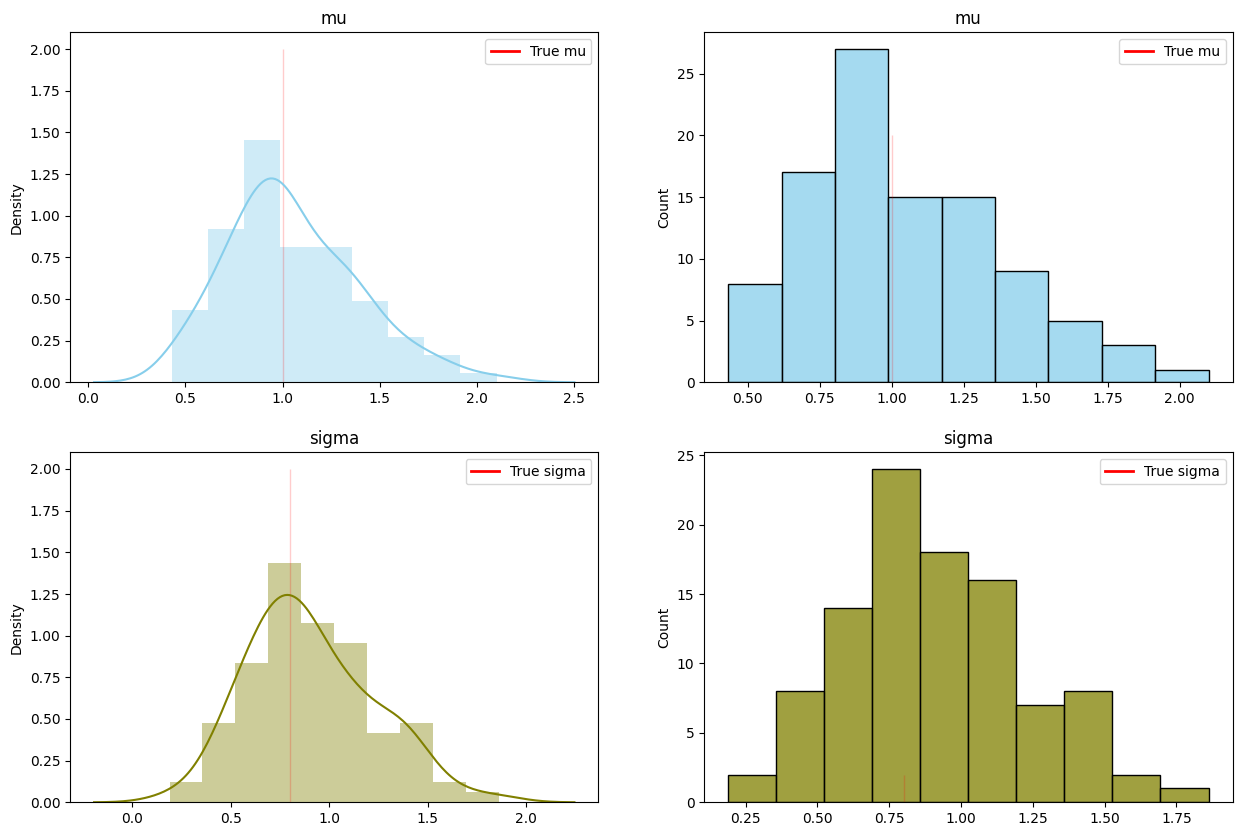

In [3]:
model.plot_histogram()

# Psychometric functions

In [12]:
number_of_trials = 30
stimulus_intensity = np.array([5, 10, 15, 20, 25, 30])
number_of_correct_responses = np.array([12, 11, 19, 27, 30, 30])

# Create a new model
model = PsychoMetric(stimulus_intensity, number_of_correct_responses, number_of_trials, p_guess=1/3)

In [13]:
model.print_parameters([15, 5], "psycho")
model.print_parameters([15, 5], "HT")

c =  10.131849003731983
sigma =  8.190826475506526
Negative log likelihood =  11.315347372636985
c =  15.692027691293188
sigma =  3.7780834209478726
Negative log likelihood =  7.637350852186732


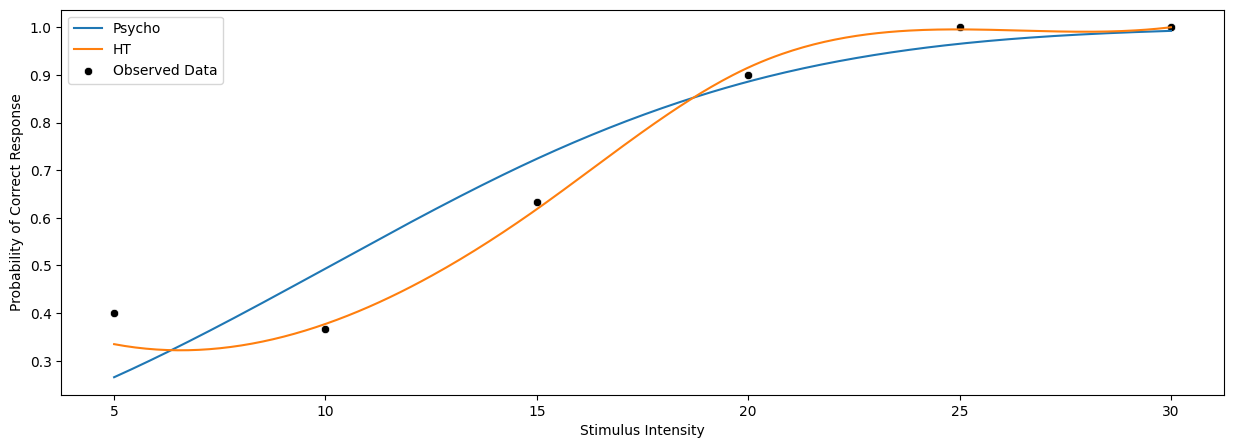

In [14]:
model.plot_psycho([15, 5])

# Magnitude Estimation

Optimal Weber fraction 0.19980887890008203
I0: 0.15559519612133466


/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:267: RuntimeWarning: invalid value encountered in log
  return (1/c)*np.log(i_s/I0)


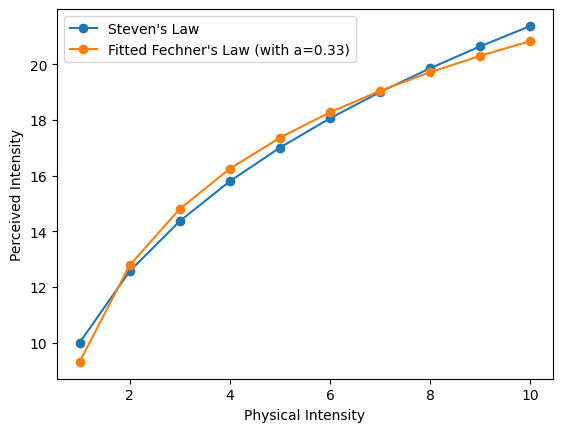

In [9]:
model = MagnitudeEsimation(10, 0.33)
model.print_fit()

Optimal Weber fraction 0.00013132317238284192
I0: 2.0418488472369387


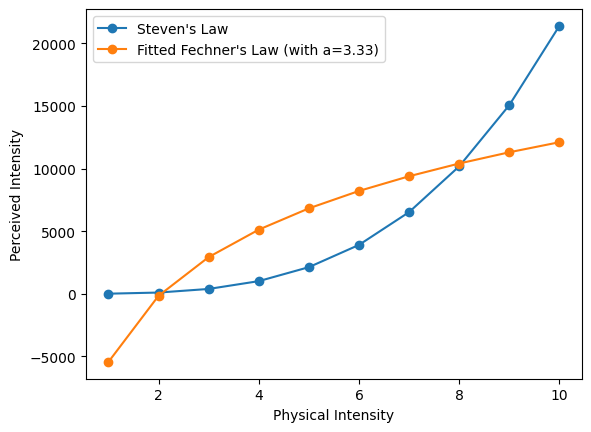

In [10]:
model = MagnitudeEsimation(10, 3.33)
model.print_fit()

# PCA Images

images/0_23_0_0_20170117144406947.jpg.chip.jpg
images/0_23_0_1_20170113133833362.jpg.chip.jpg
images/0_23_0_0_20170117144706803.jpg.chip.jpg
images/0_23_0_0_20170117144642723.jpg.chip.jpg


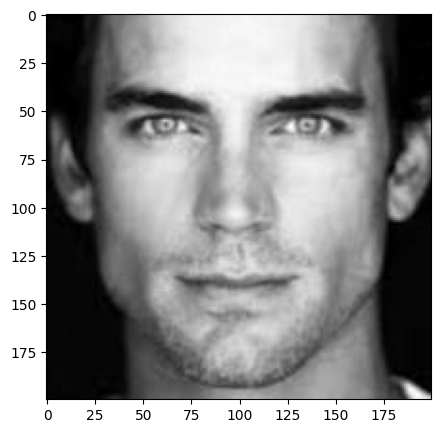

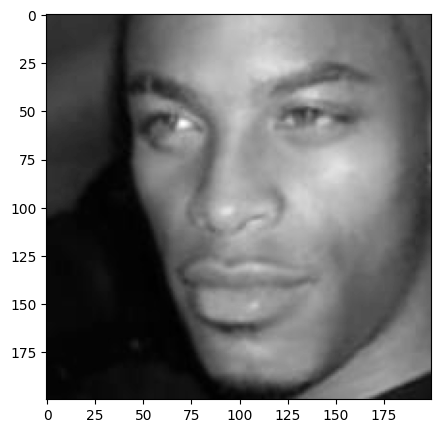

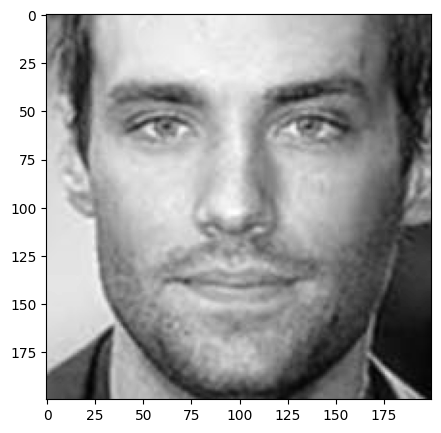

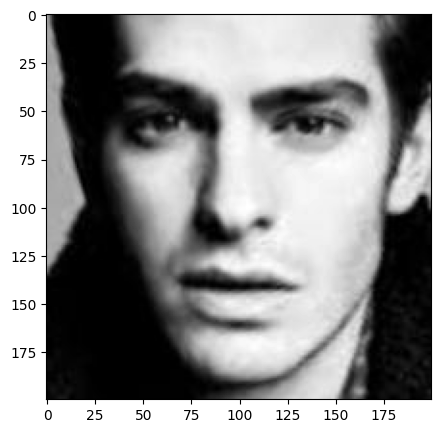

In [11]:
model = PCA_Images("images/")
images = model.load_images()
#model.plot_images(images)

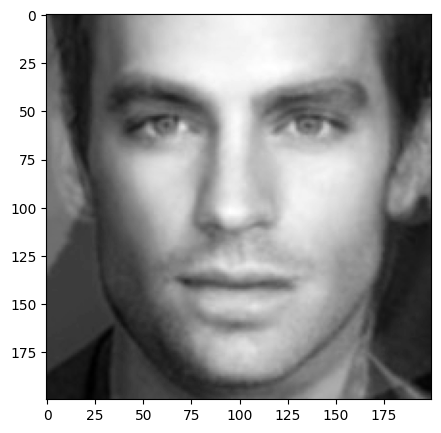

In [12]:
mean_image = model.get_mean_image(images, show=True)

(4, 40000)
The first 4 components return 0.9999999999999999 of variance


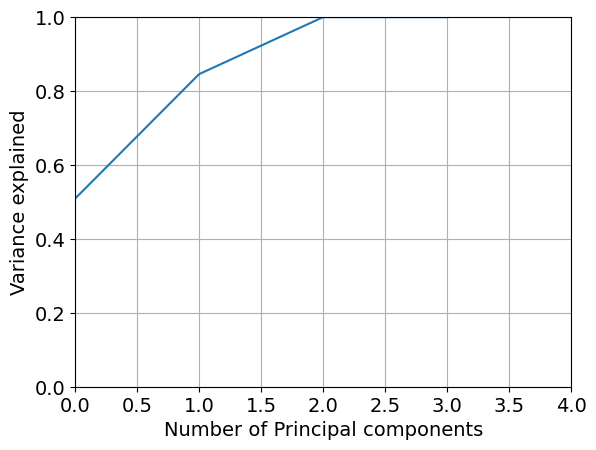

In [13]:
pca, pc_scores = model.pca(images, 4)
model.explained_variance(pca)

images/0_23_0_0_20170117144406947.jpg.chip.jpg
images/0_23_0_1_20170113133833362.jpg.chip.jpg
images/0_23_0_0_20170117144706803.jpg.chip.jpg
images/0_23_0_0_20170117144642723.jpg.chip.jpg


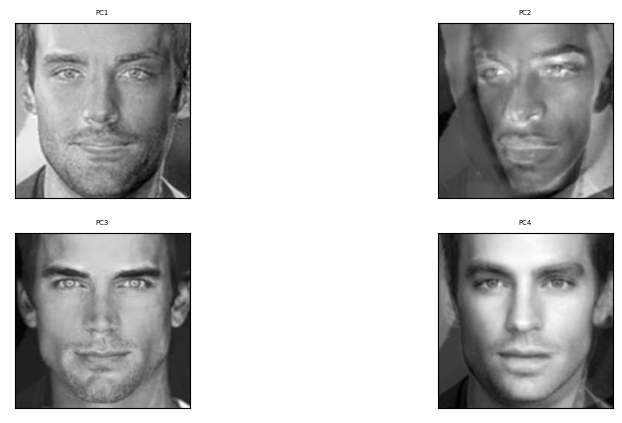

In [14]:
model.plot_pc(pca, pc_scores)

# BCI

In [2]:
import pandas as pd
data = pd.read_csv("test_data/Homework3pt2DataCSV1.txt", header = None, sep= "\s+")

In [3]:
model = BCI(n_responses=24, data=data)

In [4]:
model.print_parameters(model='Early')
model.print_parameters(model='Strong Fusion')
model.print_parameters(model='Late')

/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:644: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(self.x_a, self.n_responses, Pa))) - sum(np.log(stats.binom.pmf(self.x_v, self.n_responses, Pv))) - sum(L)
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:644: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(self.x_a, self.n_responses, Pa))) - sum(np.log(stats.binom.pmf(self.x_v, self.n_responses, Pv))) - sum(L)
/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:644: RuntimeWa

Printing parameters for Early Fusion Model
c_a:  3.1793682218281725
c_v:  1.8609707378177893
sigma_a:  0.6834998508504876
sigma_v:  0.43302737402663627
c:  0.7211211218736034
Negative Loglikelihood Value: 56.38643953061671
Printing parameters for Strong Fusion Model
P_a1: 0.035144857277498956
P_a2: 0.09161573391649973
P_a3: 0.17965109927640371
P_a4: 0.9210526566382098
P_a5: 0.9613754710175443
P_v1: 0.04861529416478027
P_v2: 0.6986231559904882
P_v3: 0.9482924048357919
P_v4: 0.972973803756389
P_v5: 0.9786687595944064
c: 0.9999999645798611
Negative Loglikelihood Value: 47.34162635779953


/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:642: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(stats.binom.pmf(self.x_av.iloc[i,j], self.n_responses, P_av_BCI[i,j])))
/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:644: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(self.x_a, self.n_responses, Pa))) - sum(np.log(stats.binom.pmf(self.x_v, self.n_responses, Pv))) - sum(L)
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:642: RuntimeWarning: divide by zero encountered in log
  L.append(

Printing parameters for Late Fusion Model
c_a:  3.119453243580061
c_v:  1.9022332598222562
sigma_a:  1.0005285004789424
sigma_v:  0.4790412508216007
c:  0.7123217285282156
Negative Loglikelihood Value: 69.11223620911568


# MLE

In [5]:
model = MLE(n_responses=24, data=data)
model.print_parameters(model='Early')
model.print_parameters(model='Fuzzy')
model.print_parameters(model='Late')

Printing parameters for Early Fusion Model
c_a:  3.311691993714958
c_v:  1.8576907134328449
sigma_a:  0.9029544131700642
sigma_v:  0.8752333962861127
Negative Loglikelihood Value: 72.80160664670224
Printing parameters for Fuzzy Model
P_a1: 0.03514486007517187
P_a2: 0.09161574078214334
P_a3: 0.17965114512100136
P_a4: 0.92105268892732
P_a5: 0.9613755136303674
P_v1: 0.04861524350880756
P_v2: 0.6986231764811097
P_v3: 0.9482923965549098
P_v4: 0.9729738059147935
P_v5: 0.9786687572306041
Negative Loglikelihood Value: 47.34162607977714
Printing parameters for Late Fusion Model
c_a:  3.2269959580645824
c_v:  1.9353987000373456
sigma_a:  1.3406117782890439
sigma_v:  1.3344489206689862
Negative Loglikelihood Value: 95.30782910293735


# ROC

In [3]:
import numpy as np
n_trials = 50
TP = np.array([49, 44, 34, 21, 11])
FN = n_trials - TP
FP = np.array([37, 33, 13, 7, 1])
TN = n_trials - FP

model = ROC(TP, FP, TN, FN)

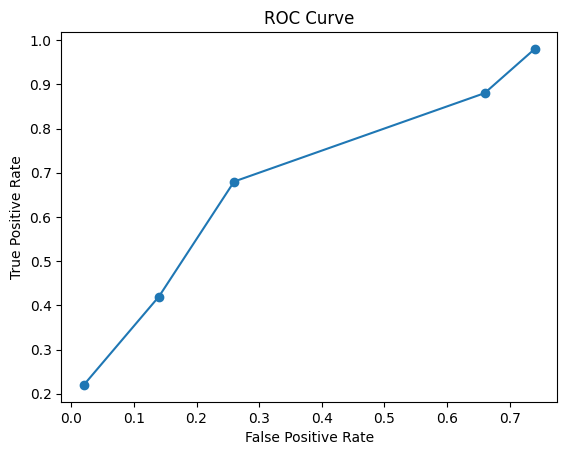

In [8]:
model.plot_ROC()

In [21]:
psycho = PsychoMetric(np.array([1,2,3,4,5]), np.array([11, 21, 34, 44, 49]), 50, p_guess=1/2)

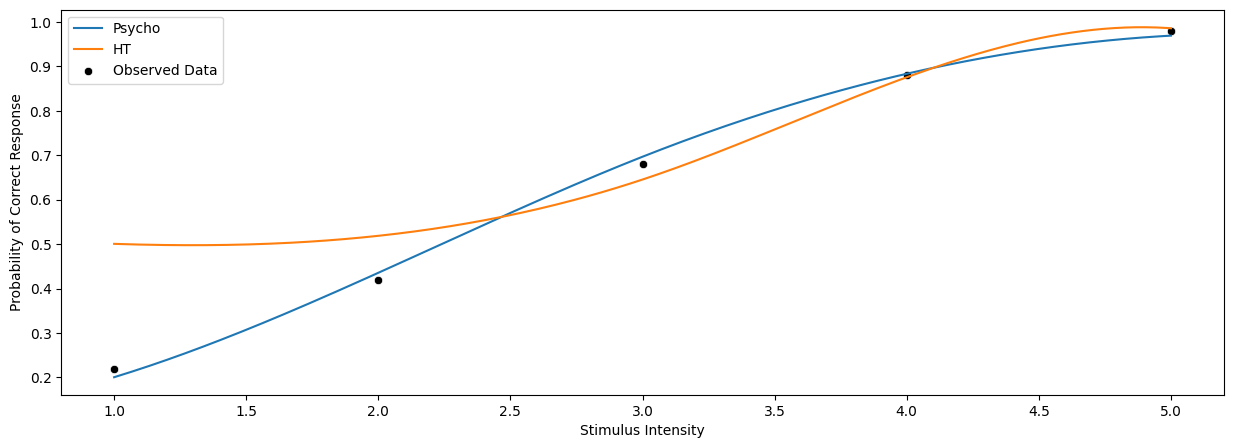

In [24]:
psycho.plot_psycho([3, 1])

# Exam2021 Q2

In [86]:
non_excited = np.array([4, 15, 22, 7, 2])
excited = np.array([2, 4, 8, 10, 26])

tprs = []
fprs = []

tp_c1 = excited[4] / n_trials
tp_c2 = (excited[4] + excited[3]) / n_trials
tp_c3 = (excited[4] + excited[3] + excited[2]) / n_trials
tp_c4 = (excited[4] + excited[3] + excited[2] + excited[1]) / n_trials

tn_c1 = (non_excited[0]) / n_trials
tn_c2 = (non_excited[0] + non_excited[1]) / n_trials
tn_c3 = (non_excited[0] + non_excited[1] + non_excited[2]) / n_trials
tn_c4 = (non_excited[0] + non_excited[1] + non_excited[2] + non_excited[3]) / n_trials

fp_c1 = (non_excited[4]) / n_trials
fp_c2 = (non_excited[4] + non_excited[3]) / n_trials
fp_c3 = (non_excited[4] + non_excited[3] + non_excited[2]) / n_trials
fp_c4 = (non_excited[4] + non_excited[3] + non_excited[2] + non_excited[1]) / n_trials

fn_c1 = (excited[0]) / n_trials
fn_c2 = (excited[0] + excited[1]) / n_trials
fn_c3 = (excited[0] + excited[1] + excited[2]) / n_trials
fn_c4 = (excited[0] + excited[1] + excited[2] + excited[3]) / n_trials

y = np.array([norm.ppf(tp_c1), norm.ppf(tp_c2), norm.ppf(tp_c3), norm.ppf(tp_c4)])
x = np.array([norm.ppf(fp_c1), norm.ppf(fp_c2), norm.ppf(fp_c3), norm.ppf(fp_c4)]).reshape((-1,1))

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)
slope, intercept = model.coef_, model.intercept_
mu = 1/slope*intercept
sigma = 1/slope
print(slope, intercept)
print(mu, sigma)


[0.53073571] 1.016446323369272
[1.91516475] [1.88417697]


In [15]:
n_trials = 50
#rebin 2-5
tn = 4
fn = 2
fp = 46
tp = 48

TPR1 = tp/(tp + fn)
FPR1 = fp/(fp + tn)

d_prime12 = norm.ppf(tp/n_trials)-norm.ppf(fp/n_trials)

In [16]:
#rebin 1-4
tp = 26
fp = 2
fn = 24
tn = 48

TPR2 = tp/(tp + fn)
FPR2 = fp/(fp + tn)

d_prime45 = norm.ppf(tp/n_trials)-norm.ppf(fp/n_trials)

In [85]:
print('mu: ', mu)
print('sigma: ', sigma)
print('d_prime_12: ', d_prime12)
print('d_prime_45: ', d_prime45)
print('slope: ', slope)
print('intercept: ', intercept)

mu:  [1.91516475]
sigma:  [1.88417697]
d_prime_12:  0.34561451094253637
d_prime_45:  1.8008396547169037
slope:  [0.53073571]
intercept:  1.016446323369272


## Exam21 Q4

In [207]:
#Linear Model
# y = x*Beta + d
img1 = np.loadtxt("exam21/image1.txt") #img 1
img2 = np.loadtxt("exam21/image2.txt") #img 2
img3 = np.loadtxt("exam21/image3.txt") #img 3
PCA_scores = np.loadtxt("exam21/PCA_Scores.txt") #x
RegressionParameters = np.loadtxt("exam21/RegressionParameters.txt") #Beta
RegressionIntercept = np.loadtxt("exam21/RegressionIntercept.txt") #d
smileIndx = np.loadtxt("exam21/smileIndx.txt") # True y
mean_image = np.loadtxt("exam21/mean_image.txt")

## Calculating the smile index based on the linear model

>* y: smile index
>* x: PCA Scores
>* beta: RegressionParameters
>* d: Slope aka. regressionIntercept

$$y = x * \beta + d$$

In [208]:
calc_smileindx = np.dot(PCA_scores, RegressionParameters) + RegressionIntercept #Predicted smile index (y)
calc_smileindx

array([0.24085966, 1.08786716, 0.65329367])

In [209]:
smileIndx

array([ 3.3794417,  1.0692027, -1.8308037])

## Recreating the images from the PCA scores and compoenents

>* w: PCA components

$$im = x * w^T$$
$$im1 = im[0,:].reshape(260,360) + mean image$$

In [210]:
#PCA_components = pd.DataFrame(np.loadtxt("exam21/PCA_Components.txt"))
PCA_components = np.loadtxt("exam21/PCA_Components.txt")
I_r = np.dot(PCA_scores, np.transpose(PCA_components)) # I_r = x*Beta    I_r is the image reconstructed


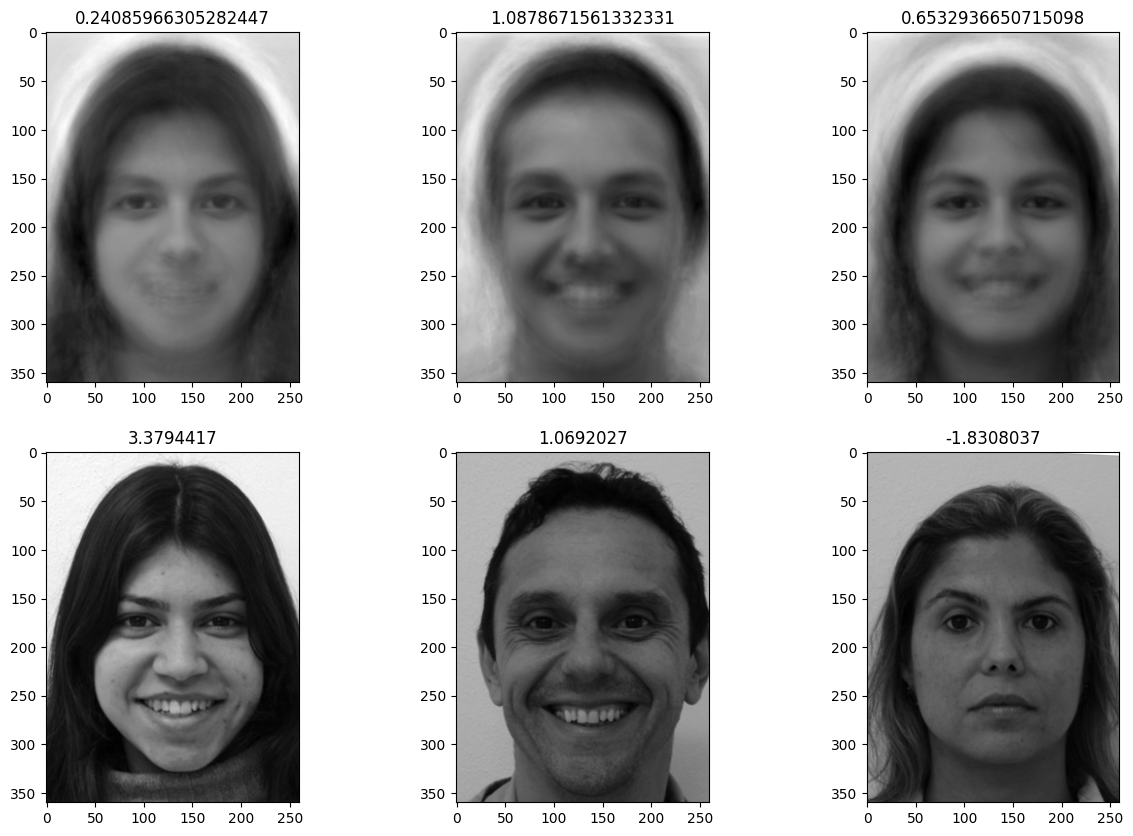

In [211]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].imshow(np.transpose(I_r[0,:].reshape(260,360)) + mean_image, cmap='gray') # here it is a flattened image being reshaped into a matrix. before it was a column, now it is a row, becoming a matrix.
axes[0,1].imshow(np.transpose(I_r[1,:].reshape(260,360)) + mean_image, cmap='gray')
axes[0,2].imshow(np.transpose(I_r[2,:].reshape(260,360)) + mean_image, cmap='gray')
axes[0,0].set_title(calc_smileindx[0])
axes[0,1].set_title(calc_smileindx[1])
axes[0,2].set_title(calc_smileindx[2])
axes[1,0].imshow(img1, cmap='gray')
axes[1,1].imshow(img2, cmap='gray')
axes[1,2].imshow(img3, cmap='gray')
axes[1,0].set_title(smileIndx[0])
axes[1,1].set_title(smileIndx[1])
axes[1,2].set_title(smileIndx[2])
plt.show()

## Change the smileindex to 0.2

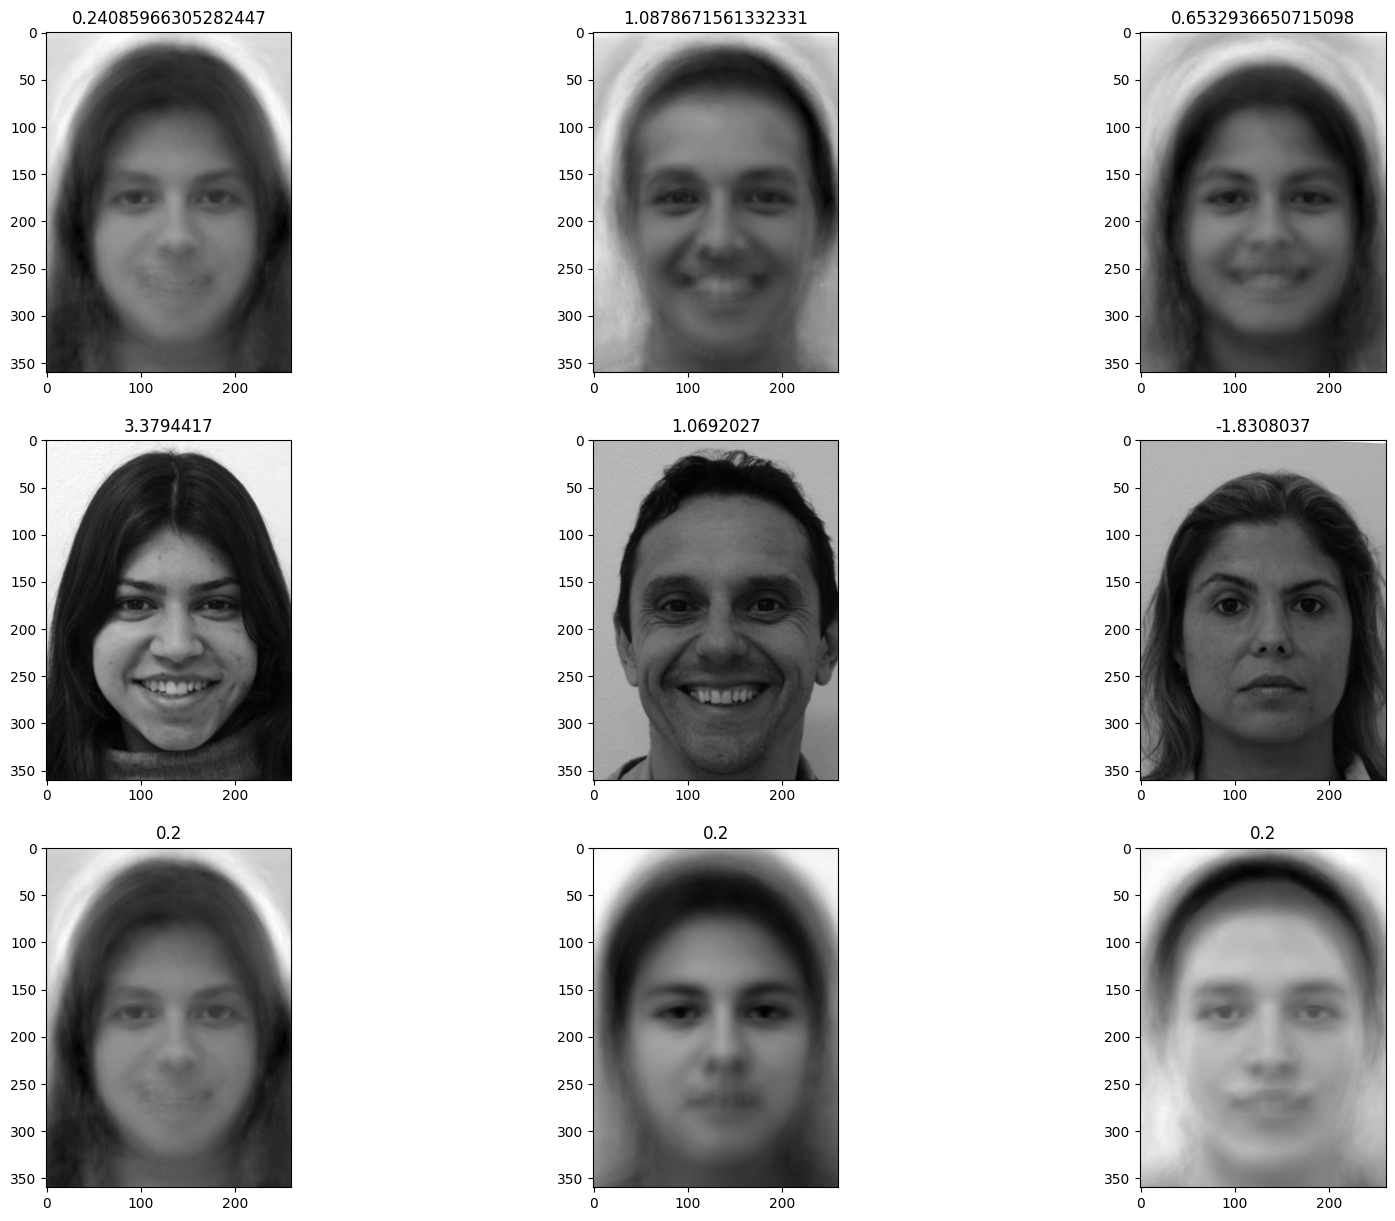

In [213]:
b = []

A = np.dot(PCA_scores, RegressionParameters)
for i in range(3):
    b.append((0.2-RegressionIntercept)/A[i])


# we have found how Scores for each image need to change in order to obtain
# a GSI of 0.2
#we compute the product now
I1_synt = np.dot(PCA_scores[0,:]*b[0], np.transpose(PCA_components)).reshape(260,360)
I2_synt = np.dot(PCA_scores[1,:]*b[1], np.transpose(PCA_components)).reshape(260,360)
I3_synt = np.dot(PCA_scores[2,:]*b[2], np.transpose(PCA_components)).reshape(260,360)


#visualize the results
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

axes[0,0].imshow(np.transpose(I_r[0,:].reshape(260,360)) + mean_image, cmap='gray')
axes[0,1].imshow(np.transpose(I_r[1,:].reshape(260,360)) + mean_image, cmap='gray')
axes[0,2].imshow(np.transpose(I_r[2,:].reshape(260,360)) + mean_image, cmap='gray')
axes[0,0].set_title(calc_smileindx[0])
axes[0,1].set_title(calc_smileindx[1])
axes[0,2].set_title(calc_smileindx[2])
axes[1,0].imshow(img1, cmap='gray')
axes[1,1].imshow(img2, cmap='gray')
axes[1,2].imshow(img3, cmap='gray')
axes[1,0].set_title(smileIndx[0])
axes[1,1].set_title(smileIndx[1])
axes[1,2].set_title(smileIndx[2])
axes[2,0].imshow(np.transpose(I1_synt) + mean_image, cmap='gray')
axes[2,1].imshow(np.transpose(I2_synt) + mean_image, cmap='gray')
axes[2,2].imshow(np.transpose(I3_synt) + mean_image, cmap='gray')
axes[2,0].set_title(0.2)
axes[2,1].set_title(0.2)
axes[2,2].set_title(0.2)
plt.show()